# Penny Statistics Lab Data Analysis Program

## 1. Import libraries. 
Select box below and hit shift-enter. This gives the computer the information it needs to run this program.

In [1]:
#Note: don't touch!
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 2. Input raw data.
Input raw data in the box below. Format appropriately according to the example data. Then, select the box and hit shift-enter.

In [2]:
#input data here in this format:
year_mass = pd.DataFrame([
    {"year": 1986, "mass": 2.5262},
    {"year": 2008, "mass": 2.5000},
    {"year": 2008, "mass": 2.4967},
    {"year": 2006, "mass": 2.4953},
    {"year": 1986, "mass": 2.4906},
    {"year": 1968, "mass": 3.0286},
    {"year": 1982, "mass": 3.1391},
    {"year": 2007, "mass": 2.5083},
    {"year": 1962, "mass": 3.1268},
    {"year": 1975, "mass": 3.1192},
    {"year": 2015, "mass": 2.5102},
    {"year": 1963, "mass": 3.1200},
])

## 3. Plot raw data.
Select box below and hit shift-enter. This plots the raw data.

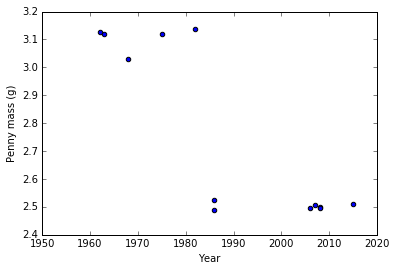

In [3]:
#plot the data for easy visualization
plt.scatter(year_mass.year, year_mass.mass)
plt.ylabel('Penny mass (g)')
plt.xlabel('Year')
#plt.title('Penny mass as a function of minting year')

## 4. Divide the data into two groups.
Pick a value (in grams) that divides the data into two groups: a group of heavy pennies and a group of light pennies. For the example data, the value 2.8 is used. Replace that number in the box below with an appropriate value for your data, then select the box and hit shift-enter. Check the plot to make sure the line divides the data as expected. If you're unsatisfied, change the number and hit shift-enter again.

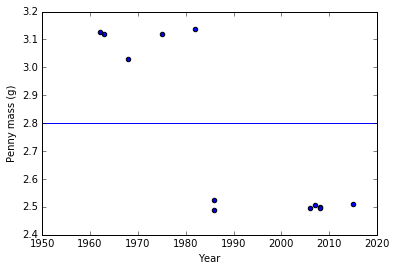

In [5]:
#input penny mass (g)
dividing_line = 2.8
plt.scatter(year_mass.year, year_mass.mass)
plt.axhline(dividing_line)
plt.ylabel('Penny mass (g)')
plt.xlabel('Year')

light_pennies = year_mass[year_mass.mass <= dividing_line]
heavy_pennies = year_mass[year_mass.mass > dividing_line]

## 5. Perform statistical analysis.
Calculate the average and standard deviation for the two groups by selecting the box below and hitting shift-enter. Keep in mind that computers, like calculators, just perform calculations without taking significant digits into account. Be sure to put the correct number of significant digits down in your lab report.

In [6]:
df = pd.DataFrame(
    {
        "heavy pennies": [np.average(heavy_pennies.mass), np.std(heavy_pennies.mass)],
        "light pennies": [np.average(light_pennies.mass),np.std(light_pennies.mass)]
    },
    columns=["heavy pennies", "light pennies"],
    index=["average", "standard deviation"]
)
df

,heavy pennies,light pennies
average,3.106740,2.503900
standard deviation,0.039715,0.011175


## 6. Compare statistical analysis to the raw data.
Calculating the average and standard deviation has fit the raw data to a "normal distribution" (also known as a "bell curve"). Check the fit of these values by comparing the curves to the raw data by selecting the box below and hitting shift-enter. If the raw data doesn't match up with the fit, contact your lab instructor or teaching assistant.

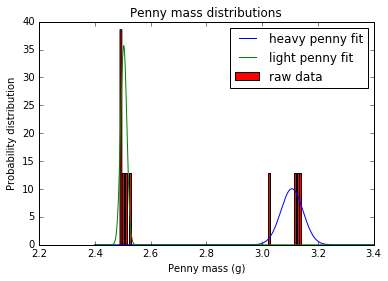

In [8]:
heavy_mean = np.average(heavy_pennies.mass)
heavy_standard_deviation = np.std(heavy_pennies.mass)

light_mean = np.average(light_pennies.mass)
light_standard_deviation = np.std(light_pennies.mass)

range = np.arange(2.4, 3.4, 0.001)

plt.plot(
    range,
    stats.norm.pdf(range, heavy_mean, heavy_standard_deviation),
    range,
    stats.norm.pdf(range, light_mean, light_standard_deviation)
)
plt.hist(year_mass.mass, 100, normed = 1)
plt.ylabel('Probability distribution')
plt.xlabel('Penny mass (g)')
plt.title('Penny mass distributions')
plt.legend(['heavy penny fit', 'light penny fit', 'raw data'], loc='upper right')
plt.show()

## 7. Perform Student's t-test
The t-test is a statistical test that is used to determine if two groups are statistically different from one another. Well separated, distinct groups will have a small p-value, and overlapping groups will have a large p-value. Normally, p < 0.05 is considered statistically different. Select the box below and hit shift-enter to calculate the p-value for your data. Record just one significant digit on your lab report.

In [9]:
test = stats.ttest_ind(heavy_pennies.mass, light_pennies.mass)
pvalue = test[1]
print("p =", pvalue)

p = 9.14045510717e-12
